# Enrolments at Scottish Universities

Investigating trends for female enrolment at Undergraduate level degree courses at Scottish Universities against male enrolment. Focus on Computing but also interested to view how Computing fairs against other subjects.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import janitor
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline

Rather than the traditional pink for female and blue for male, I went with the suffragette colors (purple and green).

In [2]:
# Customisations for plotting
male_color = "mediumaquamarine"
female_color = "darkviolet"

ticks_size = 12

<hr style="height:2.5px;background-color:darkviolet"></hr>

## Analysis of 2019/2020 academic year

### Import 2019/2020 dataset

This dataset contains a breakdown of student enrolment by subject, level of study, mode of study, country of the HE provider, and sex for academic year 2019/2020.  
Data was obtained from <a href="https://www.hesa.ac.uk/">HESA</a> and a copy is uploaded to GitHub.

In [3]:
# Path to data in Github
url = r"https://github.com/kjp07/Women-In-STEM/blob/main/data/2019-2020.csv?raw=true"

# Import 2019-2020 dataset
df_19 = pd.read_csv(url, header=14)
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32944 entries, 0 to 32943
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CAH level 1             32944 non-null  object
 1   First year marker       32944 non-null  object
 2   Level of study          32944 non-null  object
 3   Mode of study           32944 non-null  object
 4   Country of HE provider  32944 non-null  object
 5   Sex                     32944 non-null  object
 6   Academic Year           32944 non-null  object
 7   Number                  32944 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 2.0+ MB


In [4]:
df_19.head()

,CAH level 1,First year marker,Level of study,Mode of study,Country of HE provider,Sex,Academic Year,Number
0,01 Medicine and dentistry,All,All,All,All,Female,2019/20,42610
1,01 Medicine and dentistry,All,All,All,All,Male,2019/20,27605
2,01 Medicine and dentistry,All,All,All,All,Other,2019/20,150
3,01 Medicine and dentistry,All,All,All,All,Total,2019/20,70370
4,01 Medicine and dentistry,All,All,Full-time,All,Female,2019/20,36470


In [5]:
# View unique values in each column to see what can be filtered
print(df_19["CAH level 1"].unique())
print(df_19["First year marker"].unique())
print(df_19["Level of study"].unique())
print(df_19["Mode of study"].unique())
print(df_19["Country of HE provider"].unique())

['01 Medicine and dentistry' '02 Subjects allied to medicine'
 '03 Biological and sport sciences' '04 Psychology'
 '05 Veterinary sciences' '06 Agriculture, food and related studies'
 '07 Physical sciences' '08 General and others in sciences'
 '09 Mathematical sciences' '10 Engineering and technology' '11 Computing'
 '12 Geographical and environmental studies (natural sciences)'
 '13 Architecture, building and planning' 'Total science CAH level 1'
 '12 Geographical and environmental studies (social sciences)'
 '14 Humanities and liberal arts (non-specific)' '15 Social sciences'
 '16 Law' '17 Business and management' '18 Communications and media'
 '19 Language and area studies'
 '20 Historical, philosophical and religious studies'
 '21 Creative arts and design' '22 Education and teaching'
 '23 Combined and general studies' 'Total non-science CAH level 1' 'Total']
['All' 'First year' 'Other years']
['All' 'Postgraduate (research)' 'Postgraduate (taught)'
 'All postgraduate' 'First degree

### Cleaning and prep

In [6]:
# Headers to snakecase
df_19_clean = df_19.clean_names()

In [7]:
# Drop total rows (Total - Science subject areas, Total - Non-science subject areas, Total)
df_19_clean = df_19_clean[(df_19_clean["cah_level_1"] != "Total") 
                                & (df_19_clean["cah_level_1"] != "Total science CAH level 1")
                                & (df_19_clean["cah_level_1"] != "Total non-science CAH level 1")
                                & (df_19_clean["cah_level_1"] != "Combined and general studies")].copy()

In [8]:
# Remove the brackets and number/letter at the start of the Subject Area values
df_19_clean["cah_level_1"] = df_19_clean["cah_level_1"].str[3:]
subjects_19_20 = df_19_clean["cah_level_1"].unique()
print(df_19_clean["cah_level_1"].unique())

['Medicine and dentistry' 'Subjects allied to medicine'
 'Biological and sport sciences' 'Psychology' 'Veterinary sciences'
 'Agriculture, food and related studies' 'Physical sciences'
 'General and others in sciences' 'Mathematical sciences'
 'Engineering and technology' 'Computing'
 'Geographical and environmental studies (natural sciences)'
 'Architecture, building and planning'
 'Geographical and environmental studies (social sciences)'
 'Humanities and liberal arts (non-specific)' 'Social sciences' 'Law'
 'Business and management' 'Communications and media'
 'Language and area studies'
 'Historical, philosophical and religious studies'
 'Creative arts and design' 'Education and teaching'
 'Combined and general studies']


<hr style="height:2.5px;background-color:darkviolet"></hr>

### Enrolment in full-time undergraduate subjects at Scottish Universities in 2019-2020

In [9]:
# Filter for Scotland, Undergraduate level of study, and full-time study
ft_ug_scotland_19 = df_19_clean[(df_19_clean["first_year_marker"] == "First year")
                     & (df_19_clean["country_of_he_provider"] == "Scotland")
                     & (df_19_clean["level_of_study"] == "All undergraduate")
                     & (df_19_clean["mode_of_study"] == "Full-time")].copy()

In [10]:
# Filter out "Total" and "Other" in "Sex"
ft_ug_scotland_19_f_m = ft_ug_scotland_19[(ft_ug_scotland_19["sex"] != "Total") & (ft_ug_scotland_19["sex"] != "Other")].copy()

In [11]:
# Full time, UG subjects
m_f_ug = pd.pivot_table(ft_ug_scotland_19_f_m, values="number", index="cah_level_1", columns="sex").reset_index()
m_f_ug.sort_values(by="Female", ascending=False, inplace=True)
m_f_ug["Total"] = m_f_ug["Female"] + m_f_ug["Male"]

# Percentage of female
m_f_ug["% Female"] = round((m_f_ug["Female"] / m_f_ug["Total"]) * 100, 2)
m_f_ug.sort_values(by="% Female", ascending=False, inplace=True)

# Add color gradient
cm = sns.diverging_palette(160, 275, n=100, center="light", as_cmap=True)
m_f_ug.style.background_gradient(cmap=cm, subset=["% Female"])

sex,cah_level_1,Female,Male,Total,% Female
23,Veterinary sciences,370,50,420,88.100000
8,Education and teaching,1055,200,1255,84.060000
22,Subjects allied to medicine,5400,1035,6435,83.920000
20,Psychology,1415,350,1765,80.170000
15,Language and area studies,1700,565,2265,75.060000
21,Social sciences,3180,1450,4630,68.680000
7,Creative arts and design,2030,1030,3060,66.340000
18,Medicine and dentistry,1015,520,1535,66.120000
16,Law,1150,620,1770,64.970000
0,"Agriculture, food and related studies",500,275,775,64.520000


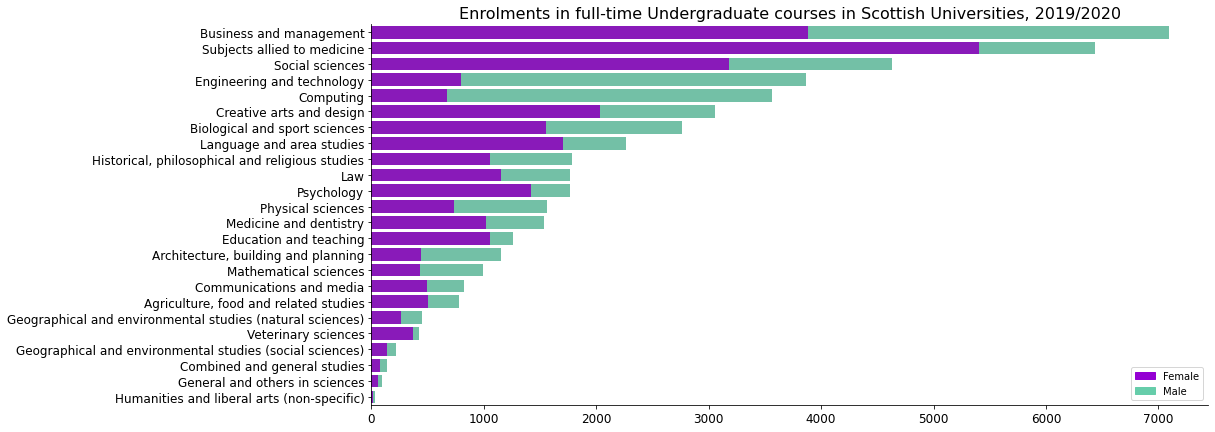

In [12]:
# Get subject list ordered by student enrolment
sort_ix = m_f_ug.sort_values(by="Total", ascending = False)["cah_level_1"].unique()

# Plot actual numbers of enrolment
plt.figure(figsize=(15,7))
t = sns.barplot(x="Total", y="cah_level_1", order = sort_ix, palette=[male_color], data=m_f_ug)
f = sns.barplot(x="Female", y="cah_level_1", order = sort_ix, palette=[female_color], data=m_f_ug)

# add legend
male_bar = mpatches.Patch(color=male_color, label='Male')
female_bar = mpatches.Patch(color=female_color, label='Female')
plt.legend(handles=[female_bar, male_bar], loc='lower right')

plt.title("Enrolments in full-time Undergraduate courses in Scottish Universities, 2019/2020", size=16)
plt.ylabel("")
plt.xlabel("")
plt.yticks(size=ticks_size)
plt.xticks(size=ticks_size)
sns.despine()
plt.show()

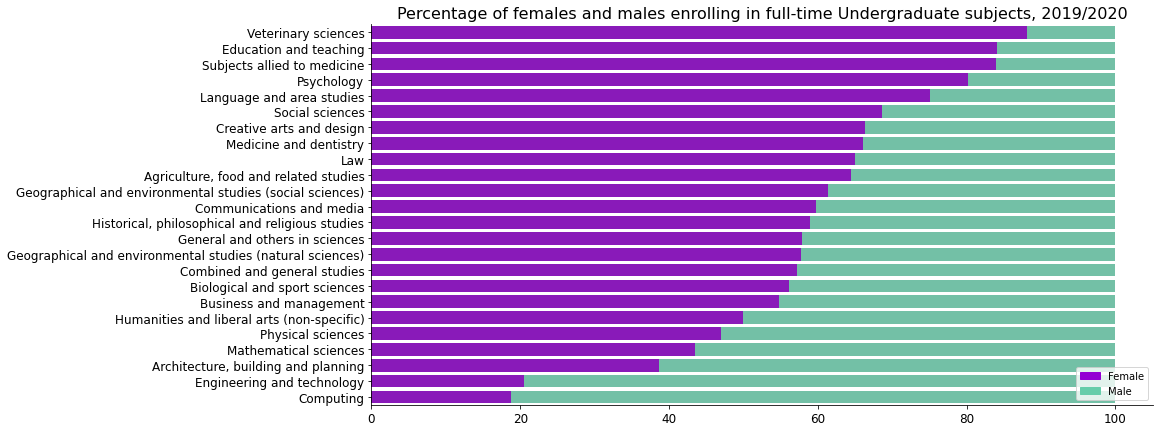

In [13]:
# Calculate percentages of female enrolment per subject
total = ft_ug_scotland_19_f_m.groupby('cah_level_1')['number'].sum().reset_index()
female = ft_ug_scotland_19_f_m[ft_ug_scotland_19_f_m["sex"] =='Female'].groupby('cah_level_1')['number'].sum().reset_index()
female['number'] = [i / j * 100 for i,j in zip(female['number'], total['number'])]
total['number'] = [i / j * 100 for i,j in zip(total['number'], total['number'])]
female.sort_values(by="number", ascending=False, inplace=True)

# set the figure size
plt.figure(figsize=(14, 7))

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="number",  y="cah_level_1", data=total, color=male_color)

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="number", y="cah_level_1", data=female, color=female_color)

# add legend
male_bar = mpatches.Patch(color=male_color, label='Male')
female_bar = mpatches.Patch(color=female_color, label='Female')
plt.legend(handles=[female_bar, male_bar], loc='lower right')

# show the graph
plt.title("Percentage of females and males enrolling in full-time Undergraduate subjects, 2019/2020", size=16)
plt.xlabel("")
plt.xticks(size=ticks_size)
plt.ylabel("")
plt.yticks(size=ticks_size)
sns.despine()
plt.show()

### Analysis

Computing has the fifth largest number in enrolments, behing Engineering and techonology, Social sciences, Subjects allied to medicine, and Business and management. Despite this, female only made up 18.82% of total enrolments in Computing. Similarly, only 20.57% of students enrolling in Engineering and techonology were female.

<hr style="height:2.5px;background-color:darkviolet"></hr>

### Enrolment in part-time undergraduate subjects at Scottish Universities in 2019-2020

In [14]:
# Filter for Scotland, Undergraduate level of study, and full-time study
pt_ug_scotland_19 = df_19_clean[(df_19_clean["first_year_marker"] == "First year")
                     & (df_19_clean["country_of_he_provider"] == "Scotland")
                     & (df_19_clean["level_of_study"] == "All undergraduate")
                     & (df_19_clean["mode_of_study"] == "Part-time")].copy()

# Filter out "Total" and "Other" in "Sex"
pt_ug_scotland_19_f_m = pt_ug_scotland_19[(pt_ug_scotland_19["sex"] != "Total") & (pt_ug_scotland_19["sex"] != "Other")].copy()

In [15]:
# Part-time, UG subjects
ug_pt = pd.pivot_table(pt_ug_scotland_19_f_m, values="number", index="cah_level_1", columns="sex").reset_index()
ug_pt.sort_values(by="Female", ascending=False, inplace=True)
ug_pt["Total"] = ug_pt["Female"] + ug_pt["Male"]

# Percentage of female
ug_pt["% Female"] = round((ug_pt["Female"] / ug_pt["Total"]) * 100, 2)
ug_pt.sort_values(by="% Female", ascending=False, inplace=True)

# Add color gradient
cm = sns.diverging_palette(160, 275, n=100, center="light", as_cmap=True)
ug_pt.style.background_gradient(cmap=cm, subset=["% Female"])

sex,cah_level_1,Female,Male,Total,% Female
12,Geographical and environmental studies (social sciences),5,0,5,100.000000
23,Veterinary sciences,20,0,20,100.000000
18,Medicine and dentistry,5,0,5,100.000000
22,Subjects allied to medicine,2360,330,2690,87.730000
21,Social sciences,1245,230,1475,84.410000
8,Education and teaching,950,285,1235,76.920000
20,Psychology,875,265,1140,76.750000
14,Humanities and liberal arts (non-specific),480,225,705,68.090000
16,Law,160,75,235,68.090000
4,Combined and general studies,1910,1105,3015,63.350000


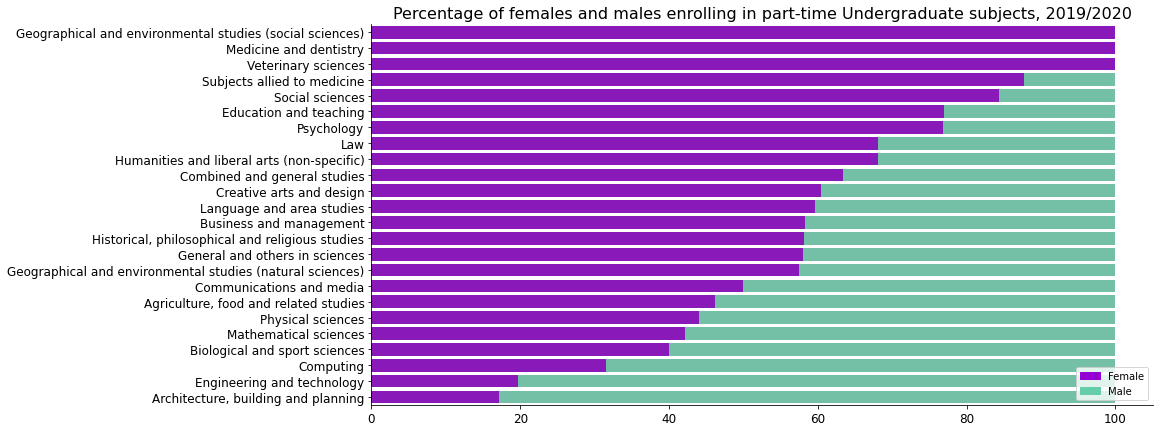

In [16]:
# Calculate percentages of female enrolment per subject
total = pt_ug_scotland_19_f_m.groupby('cah_level_1')['number'].sum().reset_index()
female = pt_ug_scotland_19_f_m[pt_ug_scotland_19_f_m["sex"] =='Female'].groupby('cah_level_1')['number'].sum().reset_index()
female['number'] = [i / j * 100 for i,j in zip(female['number'], total['number'])]
total['number'] = [i / j * 100 for i,j in zip(total['number'], total['number'])]
female.sort_values(by="number", ascending=False, inplace=True)

# set the figure size
plt.figure(figsize=(14, 7))

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="number",  y="cah_level_1", data=total, color=male_color)

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="number", y="cah_level_1", data=female, color=female_color)

# add legend
male_bar = mpatches.Patch(color=male_color, label='Male')
female_bar = mpatches.Patch(color=female_color, label='Female')
plt.legend(handles=[female_bar, male_bar], loc='lower right')

# show the graph
plt.title("Percentage of females and males enrolling in part-time Undergraduate subjects, 2019/2020", size=16)
plt.xlabel("")
plt.xticks(size=ticks_size)
plt.ylabel("")
plt.yticks(size=ticks_size)
sns.despine()
plt.show()

### Analysis

The percentage of females enrolling in part-time Undergraduate Computing subjects is higher than in full-time Computing courses (31.54% vs. 18.82%).

### Enrolment in full-time postgraduate subjects at Scottish Universities in 2019-2020

In [17]:
# Filter for Scotland, Undergraduate level of study, and full-time study
ft_pg_scotland_19 = df_19_clean[(df_19_clean["first_year_marker"] == "First year")
                     & (df_19_clean["country_of_he_provider"] == "Scotland")
                     & (df_19_clean["level_of_study"] == "All postgraduate")
                     & (df_19_clean["mode_of_study"] == "Full-time")].copy()

# Filter out "Total" and "Other" in "Sex"
ft_pg_scotland_19_f_m = ft_pg_scotland_19[(ft_pg_scotland_19["sex"] != "Total") & (ft_pg_scotland_19["sex"] != "Other")].copy()

# Drop rows with 0 
ft_pg_scotland_19_f_m = ft_pg_scotland_19_f_m[ft_pg_scotland_19_f_m['number'] != 0].copy()

In [18]:
# Full time, PG subjects
pg_ft = pd.pivot_table(ft_pg_scotland_19_f_m, values="number", index="cah_level_1", columns="sex").reset_index()
pg_ft.sort_values(by="Female", ascending=False, inplace=True)
pg_ft["Total"] = pg_ft["Female"] + pg_ft["Male"]

# Percentage of female
pg_ft["% Female"] = round((pg_ft["Female"] / pg_ft["Total"]) * 100, 2)
pg_ft.sort_values(by="% Female", ascending=False, inplace=True)

# Add color gradient
cm = sns.diverging_palette(160, 275, n=100, center="light", as_cmap=True)
pg_ft.style.background_gradient(cmap=cm, subset=["% Female"])

sex,cah_level_1,Female,Male,Total,% Female
19,Psychology,985,220,1205,81.740000
13,Humanities and liberal arts (non-specific),40,10,50,80.000000
8,Education and teaching,3265,875,4140,78.860000
21,Subjects allied to medicine,1385,450,1835,75.480000
5,Communications and media,510,200,710,71.830000
11,Geographical and environmental studies (social sciences),125,50,175,71.430000
14,Language and area studies,765,390,1155,66.230000
7,Creative arts and design,685,350,1035,66.180000
15,Law,1235,665,1900,65.000000
20,Social sciences,1520,855,2375,64.000000


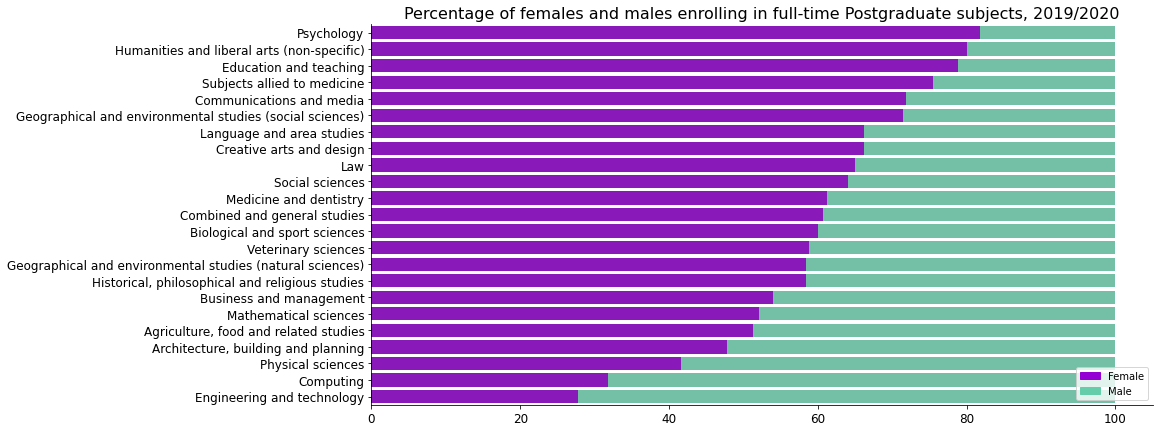

In [19]:
# Calculate percentages of female enrolment per subject
total = ft_pg_scotland_19_f_m.groupby('cah_level_1')['number'].sum().reset_index()
female = ft_pg_scotland_19_f_m[ft_pg_scotland_19_f_m["sex"] =='Female'].groupby('cah_level_1')['number'].sum().reset_index()
female['number'] = [i / j * 100 for i,j in zip(female['number'], total['number'])]
total['number'] = [i / j * 100 for i,j in zip(total['number'], total['number'])]
female.sort_values(by="number", ascending=False, inplace=True)

# set the figure size
plt.figure(figsize=(14, 7))

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="number",  y="cah_level_1", data=total, color=male_color)

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="number", y="cah_level_1", data=female, color=female_color)

# add legend
male_bar = mpatches.Patch(color=male_color, label='Male')
female_bar = mpatches.Patch(color=female_color, label='Female')
plt.legend(handles=[female_bar, male_bar], loc='lower right')

# show the graph
plt.title("Percentage of females and males enrolling in full-time Postgraduate subjects, 2019/2020", size=16)
plt.xlabel("")
plt.xticks(size=ticks_size)
plt.ylabel("")
plt.yticks(size=ticks_size)
sns.despine()
plt.show()

### Analysis

The percentage of females enrolling in full-time postgraduate Computing courses is higher than the percentage of females enrolling in full-time undergraduate Computing courses (18.54% vs 31.80%).

### Enrolment in part-time postgraduate subjects at Scottish Universities in 2019-2020

In [20]:
# Filter for Scotland, Undergraduate level of study, and full-time study
pt_pg_scotland_19 = df_19_clean[(df_19_clean["first_year_marker"] == "First year")
                     & (df_19_clean["country_of_he_provider"] == "Scotland")
                     & (df_19_clean["level_of_study"] == "All postgraduate")
                     & (df_19_clean["mode_of_study"] == "Part-time")].copy()

# Filter out "Total" and "Other" in "Sex"
pt_pg_scotland_19_f_m = pt_pg_scotland_19[(pt_pg_scotland_19["sex"] != "Total") & (pt_pg_scotland_19["sex"] != "Other")].copy()

# Drop rows with 0 
pt_pg_scotland_19_f_m = pt_pg_scotland_19_f_m[pt_pg_scotland_19_f_m['number'] != 0].copy()

In [21]:
# Full time, UG subjects
pg_pt = pd.pivot_table(pt_pg_scotland_19_f_m, values="number", index="cah_level_1", columns="sex").reset_index()
pg_pt.sort_values(by="Female", ascending=False, inplace=True)
pg_pt["Total"] = pg_pt["Female"] + pg_pt["Male"]

# Percentage of female
pg_pt["% Female"] = round((pg_pt["Female"] / pg_pt["Total"]) * 100, 2)
pg_pt.sort_values(by="% Female", ascending=False, inplace=True)

# Add color gradient
cm = sns.diverging_palette(160, 275, n=100, center="light", as_cmap=True)
pg_pt.style.background_gradient(cmap=cm, subset=["% Female"])

sex,cah_level_1,Female,Male,Total,% Female
23,Veterinary sciences,50,10,60,83.330000
22,Subjects allied to medicine,2250,465,2715,82.870000
21,Social sciences,735,235,970,75.770000
8,Education and teaching,1630,735,2365,68.920000
18,Medicine and dentistry,395,180,575,68.700000
2,Biological and sport sciences,305,145,450,67.780000
0,"Agriculture, food and related studies",105,50,155,67.740000
15,Language and area studies,125,60,185,67.570000
20,Psychology,170,85,255,66.670000
12,Geographical and environmental studies (social sciences),10,5,15,66.670000


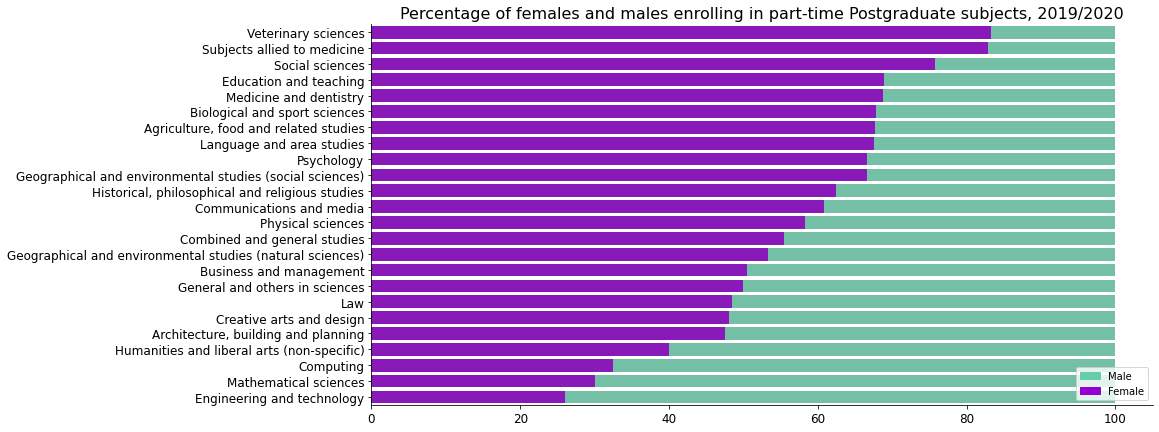

In [22]:
# Calculate percentages of female enrolment per subject
total = pt_pg_scotland_19_f_m.groupby('cah_level_1')['number'].sum().reset_index()
female = pt_pg_scotland_19_f_m[pt_pg_scotland_19_f_m["sex"] =='Female'].groupby('cah_level_1')['number'].sum().reset_index()
female['number'] = [i / j * 100 for i,j in zip(female['number'], total['number'])]
total['number'] = [i / j * 100 for i,j in zip(total['number'], total['number'])]
female.sort_values(by="number", ascending=False, inplace=True)

# set the figure size
plt.figure(figsize=(14, 7))

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="number",  y="cah_level_1", data=total, color=male_color)

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="number", y="cah_level_1", data=female, color=female_color)

# add legend
top_bar = mpatches.Patch(color=male_color, label='Male')
bottom_bar = mpatches.Patch(color=female_color, label='Female')
plt.legend(handles=[top_bar, bottom_bar], loc='lower right')

# show the graph
plt.title("Percentage of females and males enrolling in part-time Postgraduate subjects, 2019/2020", size=16)
plt.xlabel("")
plt.xticks(size=ticks_size)
plt.ylabel("")
plt.yticks(size=ticks_size)
sns.despine()
plt.show()

### Analysis

Similar to part-time UG and full-time PG, enrolment in part-time postgraduate Computing courses is made up of 30% of females.

<hr style="height:2.5px;background-color:darkviolet"></hr>

## Issues and Further Questions

One issue with the above is we don't know where students studying at Scottish Universities are from i.e. whether they are Scottish or from the rest of the UK or International. It would be useful to know what proportion of students are Scottish/UK/International, to see whether this affected the number of females studying Computing and other STEM subjects.